In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import itertools


In [25]:
with open('NER/extracted_data.json', 'r') as json_data:
    d = json.load(json_data)  # Use json.load() instead of json.loads()

print(d)


{'PORT_SPEED': [['200 mbps', 'PORT_SPEED'], ['500 mbps', 'PORT_SPEED']], 'STATES_CITIES': ['ga'], 'TERM': [['3 years', 'DATE']], 'CIR_TYPES': ['broadband', 'dia']}


In [26]:
for key in d.keys():
    print(key)

for value in d.values():
    print(value)

PORT_SPEED
STATES_CITIES
TERM
CIR_TYPES
[['200 mbps', 'PORT_SPEED'], ['500 mbps', 'PORT_SPEED']]
['ga']
[['3 years', 'DATE']]
['broadband', 'dia']


In [27]:
keys = list(d.keys())
values = [d[key] for key in keys]

combinations = list(itertools.product(*values))

df = pd.DataFrame(combinations, columns=keys)

In [28]:
df

,PORT_SPEED,STATES_CITIES,TERM,CIR_TYPES
0,"[200 mbps, PORT_SPEED]",ga,"[3 years, DATE]",broadband
1,"[200 mbps, PORT_SPEED]",ga,"[3 years, DATE]",dia
2,"[500 mbps, PORT_SPEED]",ga,"[3 years, DATE]",broadband
3,"[500 mbps, PORT_SPEED]",ga,"[3 years, DATE]",dia


In [29]:
number_words = {
    "a": 1, "one": 1, "single": 1,
    "two": 2, "three": 3, "four": 4, "five": 5,
    "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10,
    "eleven": 11, "twelve": 12, "thirteen": 13, "fourteen": 14,
    "fifteen": 15, "sixteen": 16, "seventeen": 17, "eighteen": 18, "nineteen": 19,
    "twenty": 20, "twentyone": 21, "twenty one": 21,
    "twentytwo": 22, "twenty two": 22,
    "twentythree": 23, "twenty three": 23,
    "twentyfour": 24, "twenty four": 24,
    "twentyfive": 25, "twenty five": 25,
    "twentysix": 26, "twenty six": 26,
    "twentyseven": 27, "twenty seven": 27,
    "twentyeight": 28, "twenty eight": 28,
    "twentynine": 29, "twenty nine": 29,
    "thirty": 30, "thirtyone": 31, "thirty one": 31,
    "thirtytwo": 32, "thirty two": 32,
    "thirtythree": 33, "thirty three": 33,
    "thirtyfour": 34, "thirty four": 34,
    "thirtyfive": 35, "thirty five": 35,
    "thirtysix": 36, "thirty six": 36,
    "thirtyseven": 37, "thirty seven": 37,
    "thirtyeight": 38, "thirty eight": 38,
    "thirtynine": 39, "thirty nine": 39,
    "forty": 40, "fortyone": 41, "forty one": 41,
    "fortytwo": 42, "forty two": 42,
    "fortythree": 43, "forty three": 43,
    "fortyfour": 44, "forty four": 44,
    "fortyfive": 45, "forty five": 45,
    "fortysix": 46, "forty six": 46,
    "fortyseven": 47, "forty seven": 47,
    "fortyeight": 48, "forty eight": 48,
    "fortynine": 49, "forty nine": 49,
    "fifty": 50
}

In [30]:
def clean_term(term):
    # print(term[0])
    term = str(term[0]).strip().lower()
    # print(term)

    if 'yr' in term or 'year' in term or 'years' in term or 'y' in term or 'yrs.' in term:

        parts = term.split()
        if parts[0].isdigit():
            return str(int(parts[0])*12)
        elif type(number_words[parts[0]])==int:
            return str(int(number_words[parts[0]]) * 12)
        else:
            '12'

    elif 'mo' in term or 'month' in term or 'months' in term or 'mth' in term or 'mths' in term or 'mnth' in term:
        parts = term.split()
        if parts[0].isdigit():
            return str(int(parts[0]))
        elif type(number_words[parts[0]])==int:
            return str(int(number_words[parts[0]]))
        else:
            '12'
    elif 'week' in term or 'weeks' in term or 'wk' in term:
        parts = term.split()
        if parts[0].isdigit():
            return str(int(parts[0])/4)
        elif type(number_words[parts[0]])==int:
            return str(int(number_words[parts[0]])/4)
        else:
            '12'
    return '12'



df['TERM'] = df['TERM'].apply(clean_term)

df

,PORT_SPEED,STATES_CITIES,TERM,CIR_TYPES
0,"[200 mbps, PORT_SPEED]",ga,36,broadband
1,"[200 mbps, PORT_SPEED]",ga,36,dia
2,"[500 mbps, PORT_SPEED]",ga,36,broadband
3,"[500 mbps, PORT_SPEED]",ga,36,dia


In [31]:
df

,PORT_SPEED,STATES_CITIES,TERM,CIR_TYPES
0,"[200 mbps, PORT_SPEED]",ga,36,broadband
1,"[200 mbps, PORT_SPEED]",ga,36,dia
2,"[500 mbps, PORT_SPEED]",ga,36,broadband
3,"[500 mbps, PORT_SPEED]",ga,36,dia


In [32]:
import pandas as pd
import re

def clean_port_speed(value):
    if isinstance(value, list):
        value = value[0]  

    if pd.isna(value):
        return None

    value = str(value).strip().lower()  # Ensure it's a string

    numbers = [float(n) for n in re.findall(r"[\d\.]+", value)]
    print(numbers)
    if not numbers:
        return None

    max_value = max(numbers)

    if "g" in value:
        max_value *= 1000  # Convert Gbps to Mbps

    return int(max_value)

df['PORT_SPEED'] = df['PORT_SPEED'].apply(clean_port_speed)


[200.0]
[200.0]
[500.0]
[500.0]


In [33]:
df

,PORT_SPEED,STATES_CITIES,TERM,CIR_TYPES
0,200,ga,36,broadband
1,200,ga,36,dia
2,500,ga,36,broadband
3,500,ga,36,dia


In [34]:
column_mapping = {
    'STATES_CITIES': 'A Loc State',
    'CIR_TYPES': 'generalized_Cir'
}

# Rename columns in test_data
df.rename(columns=column_mapping, inplace=True)

# Verify the updated column names
print(df.columns)


Index(['PORT_SPEED', 'A Loc State', 'TERM', 'generalized_Cir'], dtype='object')


In [35]:
df

,PORT_SPEED,A Loc State,TERM,generalized_Cir
0,200,ga,36,broadband
1,200,ga,36,dia
2,500,ga,36,broadband
3,500,ga,36,dia


In [36]:
import pickle

with open("model_and_encoders/label_encoders.pkl", "rb") as f:
    label_encoders = pickle.load(f)

print(label_encoders.keys())


dict_keys(['A Loc State', 'generalized_Cir'])


In [37]:
# Ensure test_data exists
for col in ['A Loc State', 'generalized_Cir']:
    if col in df.columns:
        df[col + '_Freq'] = df[col].map(
            lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1
        )


In [38]:
df

,PORT_SPEED,A Loc State,TERM,generalized_Cir,A Loc State_Freq,generalized_Cir_Freq
0,200,ga,36,broadband,16,0
1,200,ga,36,dia,16,2
2,500,ga,36,broadband,16,0
3,500,ga,36,dia,16,2


In [39]:
df[(df['A Loc State_Freq'] == -1)]

,PORT_SPEED,A Loc State,TERM,generalized_Cir,A Loc State_Freq,generalized_Cir_Freq


In [40]:
# Extract indexes where 'A Loc State_Freq' is -1
removed_indexes = df[df['A Loc State_Freq'] == -1].index.tolist()

# Filter the DataFrame
new_test_data = df[df['A Loc State_Freq'] != -1]

# Print or use the list of removed indexes
print(removed_indexes)


[]


In [41]:
df.drop(columns=['A Loc State', 'generalized_Cir'], inplace=True)

In [42]:
df

,PORT_SPEED,TERM,A Loc State_Freq,generalized_Cir_Freq
0,200,36,16,0
1,200,36,16,2
2,500,36,16,0
3,500,36,16,2


In [43]:
Provider_encoded = [1419, 1392, 1676.5, 805, 1295]

In [44]:
# for i in range(5):
#     df[f'Provider_{i}'] = Provider_encoded[i]
# df['TERM'] = pd.to_numeric(df['TERM'], errors='coerce').astype('Int64')


In [45]:
df

,PORT_SPEED,TERM,A Loc State_Freq,generalized_Cir_Freq
0,200,36,16,0
1,200,36,16,2
2,500,36,16,0
3,500,36,16,2


In [46]:
import joblib
temp_data = pd.DataFrame()
best_xgb= joblib.load("./model_and_encoders/best_xgb_model.pkl")
print("Model loaded successfully.")

for i in range(5):
    features_inorder = [
    'PORT_SPEED', 'TERM', 'A Loc State_Freq', 
    f'Provider_{i}',
    'generalized_Cir_Freq']

    X_test = df[features_inorder]

    y_pred = best_xgb.predict(X_test)

    y_pred

    temp_data[f'prediction_provider_{i}'] = y_pred

Model loaded successfully.


KeyError: "['Provider_0'] not in index"

In [ ]:
temp_data

,prediction_provider_0,prediction_provider_1,prediction_provider_2,prediction_provider_3,prediction_provider_4
0,2120.674561,516.114197,1635.769165,4692.243652,1888.989502
1,2120.674561,516.114197,1635.769165,4692.243652,1888.989502
2,3041.960205,1014.403625,2649.844971,7532.590820,2100.176514
3,3041.960205,1014.403625,2649.844971,7532.590820,2100.176514


/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_45064/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


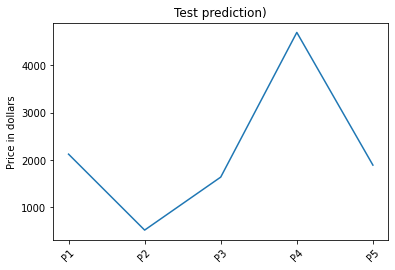

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_45064/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


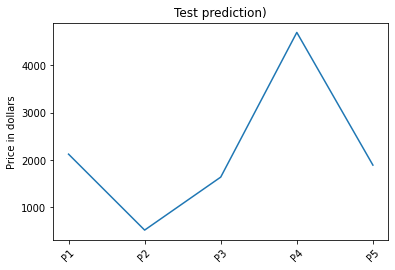

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_45064/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


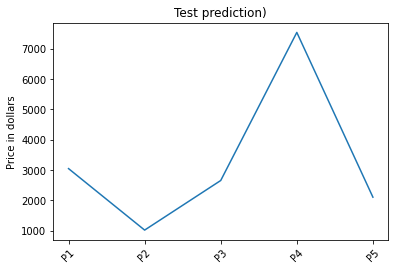

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_45064/3765516907.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=providers, y=values, palette="viridis")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


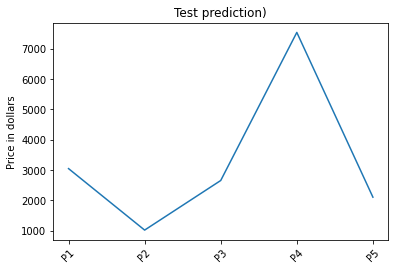

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

providers = ['P1', 'P2', 'P3', 'P4', 'P5']

for i in range(len(temp_data)):

    values = temp_data.iloc[i,:]

    sns.lineplot(x=providers, y=values, palette="viridis")
    plt.xticks(rotation=45)
    plt.title("Test prediction)")
    plt.ylabel("Price in dollars")
    plt.show()

In [ ]:
"""
Zayo	
Verizon	
Centurylink	
Colt	
AT&T	
"""

'\nZayo\t\nVerizon\t\nCenturylink\t\nColt\t\nAT&T\t\n'